In [3]:
import pandas as pd

In [11]:
wc=pd.read_excel("cloudwords.xlsx",sheet_name="Sheet1")

In [12]:
print(wc)

              Wordscloud
0                 python
1              functions
2                    idx
3                    min
4                    max
..                   ...
70               aggfunc
71    true,false,margins
72            fill_value
73  pip install psycopg2
74  pip installwordcloud

[75 rows x 1 columns]


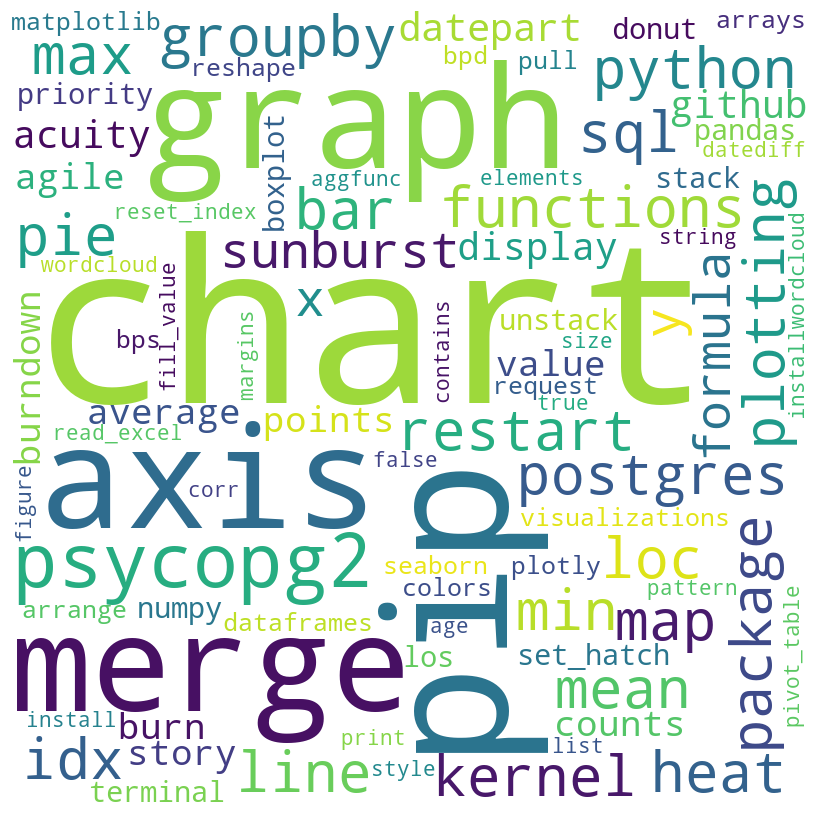

In [15]:
#additional analysis
import sys
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

comment_words = ''
stopwords = set(STOPWORDS)
 

for val in wc.Wordscloud:
     
    
    val = str(val)
 
    
    tokens = val.split()
   
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

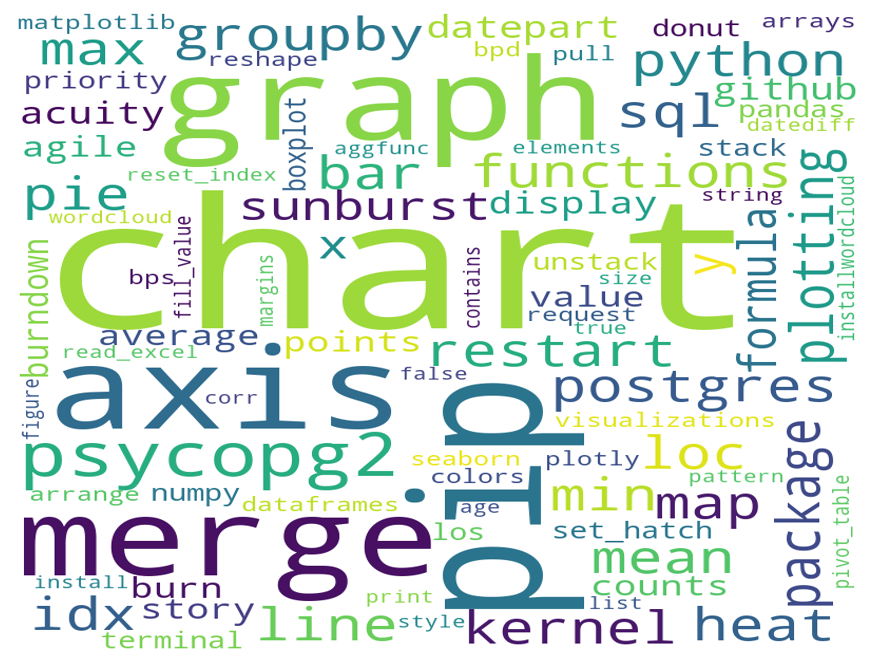

In [1]:
import pandas as pd
#Read file from local folder
Datafilepath = 'HospitalDatabase.xlsx'
xl = pd.ExcelFile(Datafilepath)
sheets = xl.sheet_names
for i, sheet in enumerate(sheets):
    locals()['df'+ str(i+1)] = pd.read_excel(Datafilepath, sheet_name = sheet)
    print(locals()['df'+ str(i+1)]) #Printing dataset for clarity

     PatientID FirstName  LastName             DateOfBirth Gender  \
0            1     Lanni       Sue 1960-01-01 00:00:00.000   Male   
1            2       Far     Myers 1985-11-15 02:08:42.090   Male   
2            3   Devlin    Michael 1976-04-15 02:52:09.762   Male   
3            4   Carmine     Texas 1968-10-15 03:32:13.635   Male   
4            5     Tann       Bama 1962-05-01 19:12:58.950   Male   
..         ...       ...       ...                     ...    ...   
940        941       Wat   Fideler 1986-05-26 00:01:19.761   Male   
941        942    Wandie  Baythrop 1970-06-10 21:41:03.814   Male   
942        943   Diahann   Smeeton 1983-01-08 21:49:27.884   Male   
943        944  Panchito   Sharple 1963-06-05 07:57:05.569   Male   
944        945     Walsh    Calvie 1972-08-06 03:40:03.454   Male   

                       Race Language  
0                     White  English  
1                     White  English  
2                     White  English  
3              

     EDVisitID  PatientID               VisitDate         EDDischargeTime  \
0            1          1 2020-01-01 00:00:00.000 2020-01-01 11:20:22.924   
1           12         12 2020-01-01 02:45:40.302 2020-01-02 02:00:00.517   
2           13         13 2020-01-01 03:09:24.701 2020-01-01 05:00:20.852   
3           14         14 2020-01-01 03:12:19.349 2020-01-01 04:32:29.142   
4           15         15 2020-01-01 03:46:32.698 2020-01-01 06:24:52.741   
..         ...        ...                     ...                     ...   
940       1183        929 2020-01-15 10:38:42.570 2020-01-16 02:31:52.023   
941       1186        932 2020-01-15 11:52:37.540 2020-01-16 10:19:41.570   
942       1187        933 2020-01-15 12:11:11.678 2020-01-15 16:41:15.223   
943       1188        934 2020-01-15 12:21:46.006 2020-01-15 18:32:21.060   
944       1189        935 2020-01-15 12:51:14.875 2020-01-15 23:40:41.456   

     Acuity ReasonForVisit EDDisposition  
0         1   Stomach Ache      

In [2]:
#additional analysis:No of patient count by visit type and reason for visit?
#------------------------------------------------------------------------------
df=df3.rename(columns={'PatientMRN': 'PatientID'})
a= pd.merge(df,df2, on='PatientID')
b=a.groupby(['VisitType','ReasonForVisit'])['PatientID'].count()
print(b)

VisitType     ReasonForVisit     
Follow Up     Accident                9
              Bleeding               14
              Car Accident            9
              Chest Pain             40
              Cough                  13
              Fever                  78
              Gun Shot                9
              Intoxication            5
              Laceration             11
              Migraine               72
              Pneumonia              55
              Shortness of Breath    52
              Stomach Ache           84
New           Accident                4
              Bleeding                6
              Car Accident            3
              Chest Pain             12
              Fever                  34
              Gun Shot                2
              Laceration              6
              Migraine               25
              Pneumonia              21
              Shortness of Breath    18
              Stomach Ache           26
Physic

In [26]:
#Find the reason of visit for readmitted patients with respect to the primary diagnosis.
# This will help in understanding if the patients returned for symptoms relating to their primary diagnosis or something else.
new = df4.fillna(0)
new['ReadmissionFlag'].astype(int)

readmitted_patients = new.loc[new['ReadmissionFlag'] == 1]
readmitted_patients_merged = pd.merge(readmitted_patients, df7, on=['PatientID'], how = 'inner')
pd.pivot_table(readmitted_patients_merged, values='PatientID', index=['PrimaryDiagnosis'], columns=['ReasonForVisit'], \
                   aggfunc='count', fill_value='', margins=False,\
                   dropna=True, margins_name='All', observed=False, sort=True)


ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
PrimaryDiagnosis,,,,,,,,,,,,
Flu,,,,,5.0,2.0,,,3.0,4.0,2.0,4.0
Heart Failure,1.0,2.0,1.0,8.0,9.0,,1.0,2.0,4.0,9.0,4.0,4.0
Hip Fracture,1.0,,,,,,,,,,,
Hypertension,1.0,,,3.0,4.0,,,1.0,2.0,3.0,2.0,1.0
Knee Replacement,,,,,,,,,1.0,,,
Laceration,,,,,,,,,1.0,,,
Pain,,,,,,,,,1.0,,,
Pneumonia,3.0,2.0,2.0,5.0,6.0,1.0,2.0,,4.0,11.0,9.0,11.0
Stroke,1.0,,2.0,7.0,8.0,,4.0,1.0,6.0,9.0,9.0,5.0


In [57]:
#Which ProviderID has the maximum visits in any department.

df3.groupby(['VisitDepartmentID', 'ProviderID'])['ProviderID'].count().\
reset_index(name='Maximum Visits').sort_values(['Maximum Visits'], ascending=False).head(1)


,VisitDepartmentID,ProviderID,Maximum Visits
304,10,14,6


In [56]:
#Calculate no of patients readmitted based on the primary diagnosis.
readmitted_patients = df4.loc[df4['ReadmissionFlag'] == 1]
readmitted_patients.groupby(['PrimaryDiagnosis'])['DaysToReadmission'].count().reset_index(name = 'Number of Readmitted Patients').\
sort_values(['Number of Readmitted Patients'], ascending = False)


,PrimaryDiagnosis,Number of Readmitted Patients
7,Pneumonia,56
8,Stroke,52
1,Heart Failure,45
0,Flu,20
3,Hypertension,17
2,Hip Fracture,1
4,Knee Replacement,1
5,Laceration,1
6,Pain,1
